## 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Creating path

path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA'

In [6]:
# Importing Data

listings = pd.read_csv(os.path.join(path, 'listings_cleaned.csv'), index_col = False)

In [8]:
# Checking dataframe

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   name                                          8976 non-null   object 
 2   description                                   8714 non-null   object 
 3   host_id                                       8976 non-null   int64  
 4   host_since                                    8976 non-null   object 
 5   host_response_time                            8395 non-null   object 
 6   host_response_rate                            8395 non-null   float64
 7   host_acceptance_rate                          8594 non-null   float64
 8   host_is_superhost                             8568 non-null   object 
 9   host_total_listings_count                     8976 non-null   i

## 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

    For instance, discard “ID,” “date,” and “index” variables.


In [11]:
# Relevant columns subset

relevant_columns = [
    'price', 'latitude', 'longitude', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'reviews_per_month',
    'number_of_reviews', 'host_since', 'host_is_superhost', 'host_total_listings_count',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_identity_verified',
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
]

listings_visuals = listings[relevant_columns]

# Export to a new csv

listings_visuals.to_csv(os.path.join(path,'listings_visuals.csv'), index=False)

## 3. Create a correlation matrix heatmap (colored).

    Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


In [16]:
# Numerical columns subset

numerical_columns = listings_visuals.select_dtypes(include=['int', 'float'])

In [18]:
# Correlation matrix

numerical_columns.corr()

price  latitude  longitude  \
price                                         1.000000 -0.009537   0.031140   
latitude                                     -0.009537  1.000000   0.387913   
longitude                                     0.031140  0.387913   1.000000   
accommodates                                  0.228167  0.024072   0.019334   
bathrooms                                     0.232147  0.011820   0.035352   
bedrooms                                      0.199108  0.021527   0.013880   
beds                                          0.222208  0.014923   0.011323   
minimum_nights                               -0.009213 -0.007093   0.000644   
maximum_nights                                0.012874 -0.003568   0.041704   
reviews_per_month                            -0.094542 -0.033247  -0.063385   
number_of_reviews                            -0.063656 -0.002769  -0.005152   
host_total_listings_count                     0.040772  0.017688  -0.004186   
host_response_rate                            0.021432  0.010956   0.008958   
host_acceptance_rate                          0.019972 -0.007071   0.036904   
calculated_host_listings_count                0.050635  0.011227   0.026388   
calculated_host_listings_count_entire_homes   0.050349  0.007292   0.028479   
calculated_host_listings_count_private_rooms  0.004909  0.031813  -0.013403   
calculated_host_listings_count_shared_rooms  -0.012974 -0.034463  -0.026375   

                                              accommodates  bathrooms  \
price                                             0.228167   0.232147   
latitude                                          0.024072   0.011820   
longitude                                         0.019334   0.035352   
accommodates                                      1.000000   0.594699   
bathrooms                                         0.594699   1.000000   
bedrooms                                          0.780564   0.645662   
beds                                              0.786033   0.586621   
minimum_nights                                   -0.025234  -0.000356   
maximum_nights                                    0.056018   0.027537   
reviews_per_month                                -0.147720  -0.081995   
number_of_reviews                                -0.081075  -0.048998   
host_total_listings_count                         0.096885   0.049048   
host_response_rate                               -0.000016   0.007190   
host_acceptance_rate                              0.000441  -0.007557   
calculated_host_listings_count                    0.080095   0.044697   
calculated_host_listings_count_entire_homes       0.083689   0.033269   
calculated_host_listings_count_private_rooms     -0.020987   0.090666   
calculated_host_listings_count_shared_rooms      -0.049092  -0.006783   

                                              bedrooms      beds  \
price                                         0.199108  0.222208   
latitude                                      0.021527  0.014923   
longitude                                     0.013880  0.011323   
accommodates                                  0.780564  0.786033   
bathrooms                                     0.645662  0.586621   
bedrooms                                      1.000000  0.768999   
beds                                          0.768999  1.000000   
minimum_nights                                0.014858 -0.004943   
maximum_nights                                0.010126  0.053866   
reviews_per_month                            -0.130933 -0.157867   
number_of_reviews                            -0.080484 -0.035588   
host_total_listings_count                     0.053430  0.081677   
host_response_rate                           -0.008023  0.008517   
host_acceptance_rate                         -0.045669 -0.012178   
calculated_host_listings_count               -0.008323  0.058249   
calculated_host_listings_count_entire_homes  -0.008155  0.054435   
cal

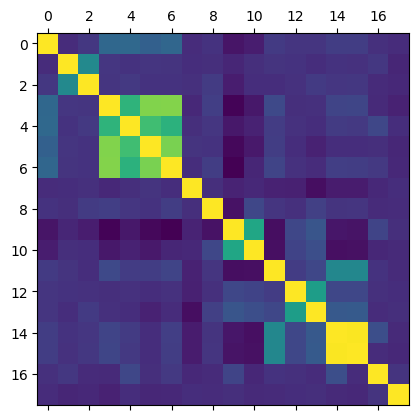

In [20]:
# Create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

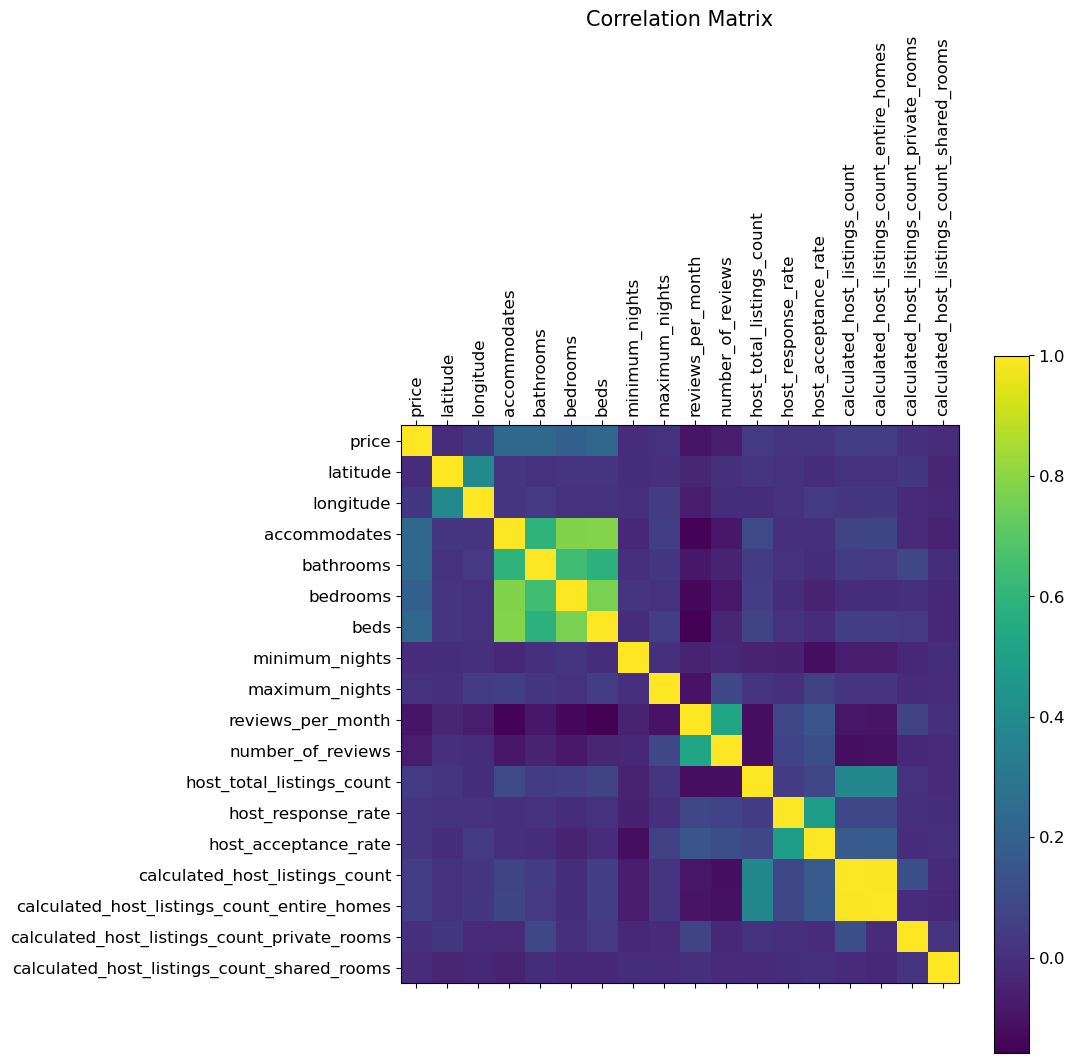

In [26]:
# Set the size of the heatmap
f = plt.figure(figsize=(9,9)) 

# Define the type of plot and use the correlation matrix of numerical columns
plt.matshow(numerical_columns.corr(), fignum=f.number) 

# Add x and y ticks with the column names and adjust font size and rotation
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12)

# Add a color legend
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=12) 

# Add a title to the heatmap
plt.title('Correlation Matrix', fontsize=15) 

# Saving visualization

plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\correlation_matrix_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()

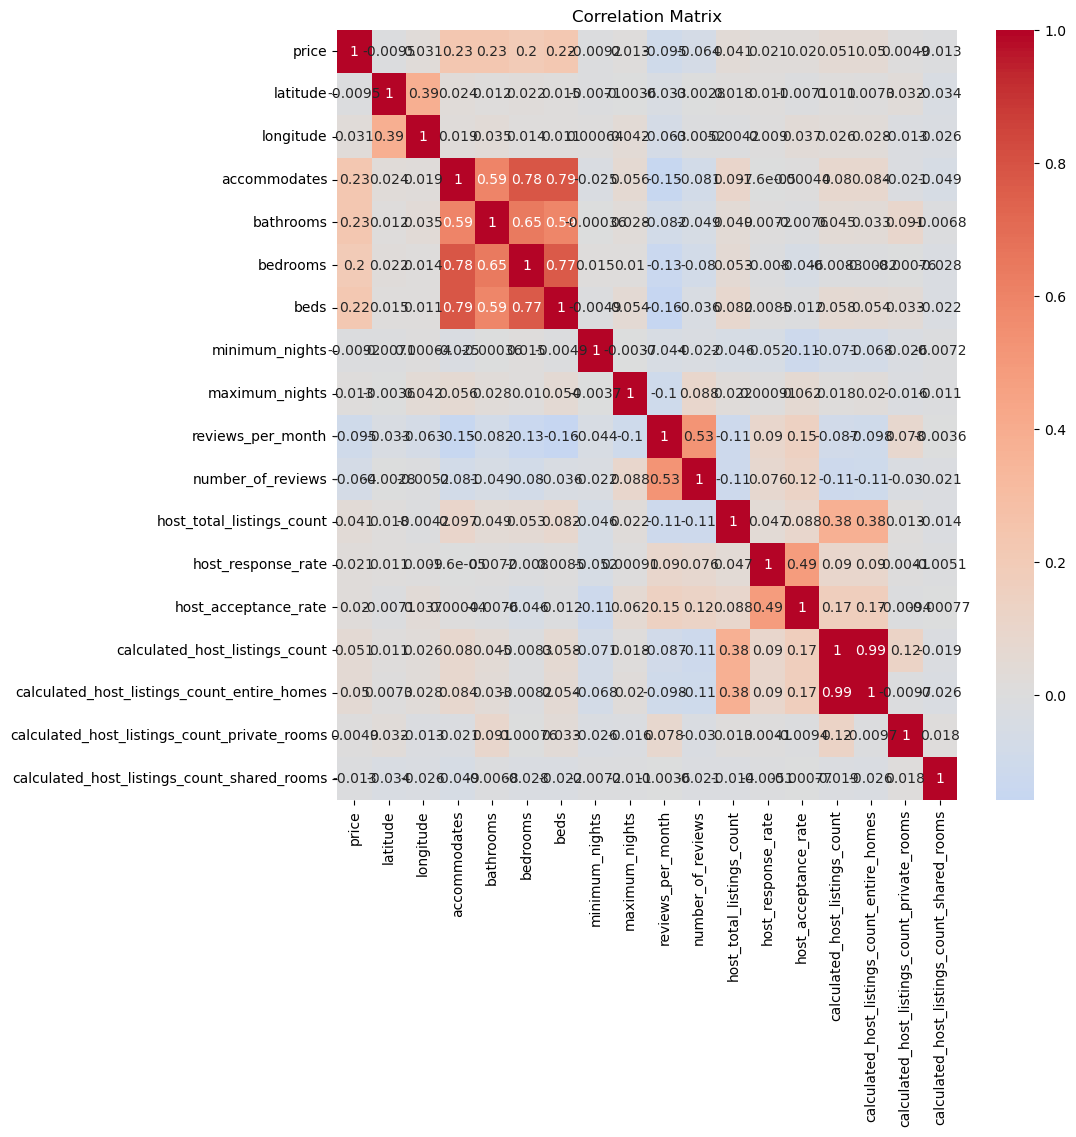

In [30]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot=True, ax=ax, cmap='coolwarm', center=0) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
# The `cmap` argument sets the color map to 'coolwarm' for better visualization.
# The `center` argument centers the colormap at 0.

# Add a title to the heatmap
ax.set_title('Correlation Matrix')

# Save the image
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\correlation_matrix_2.png', bbox_inches='tight')

# Show the plot
plt.show()

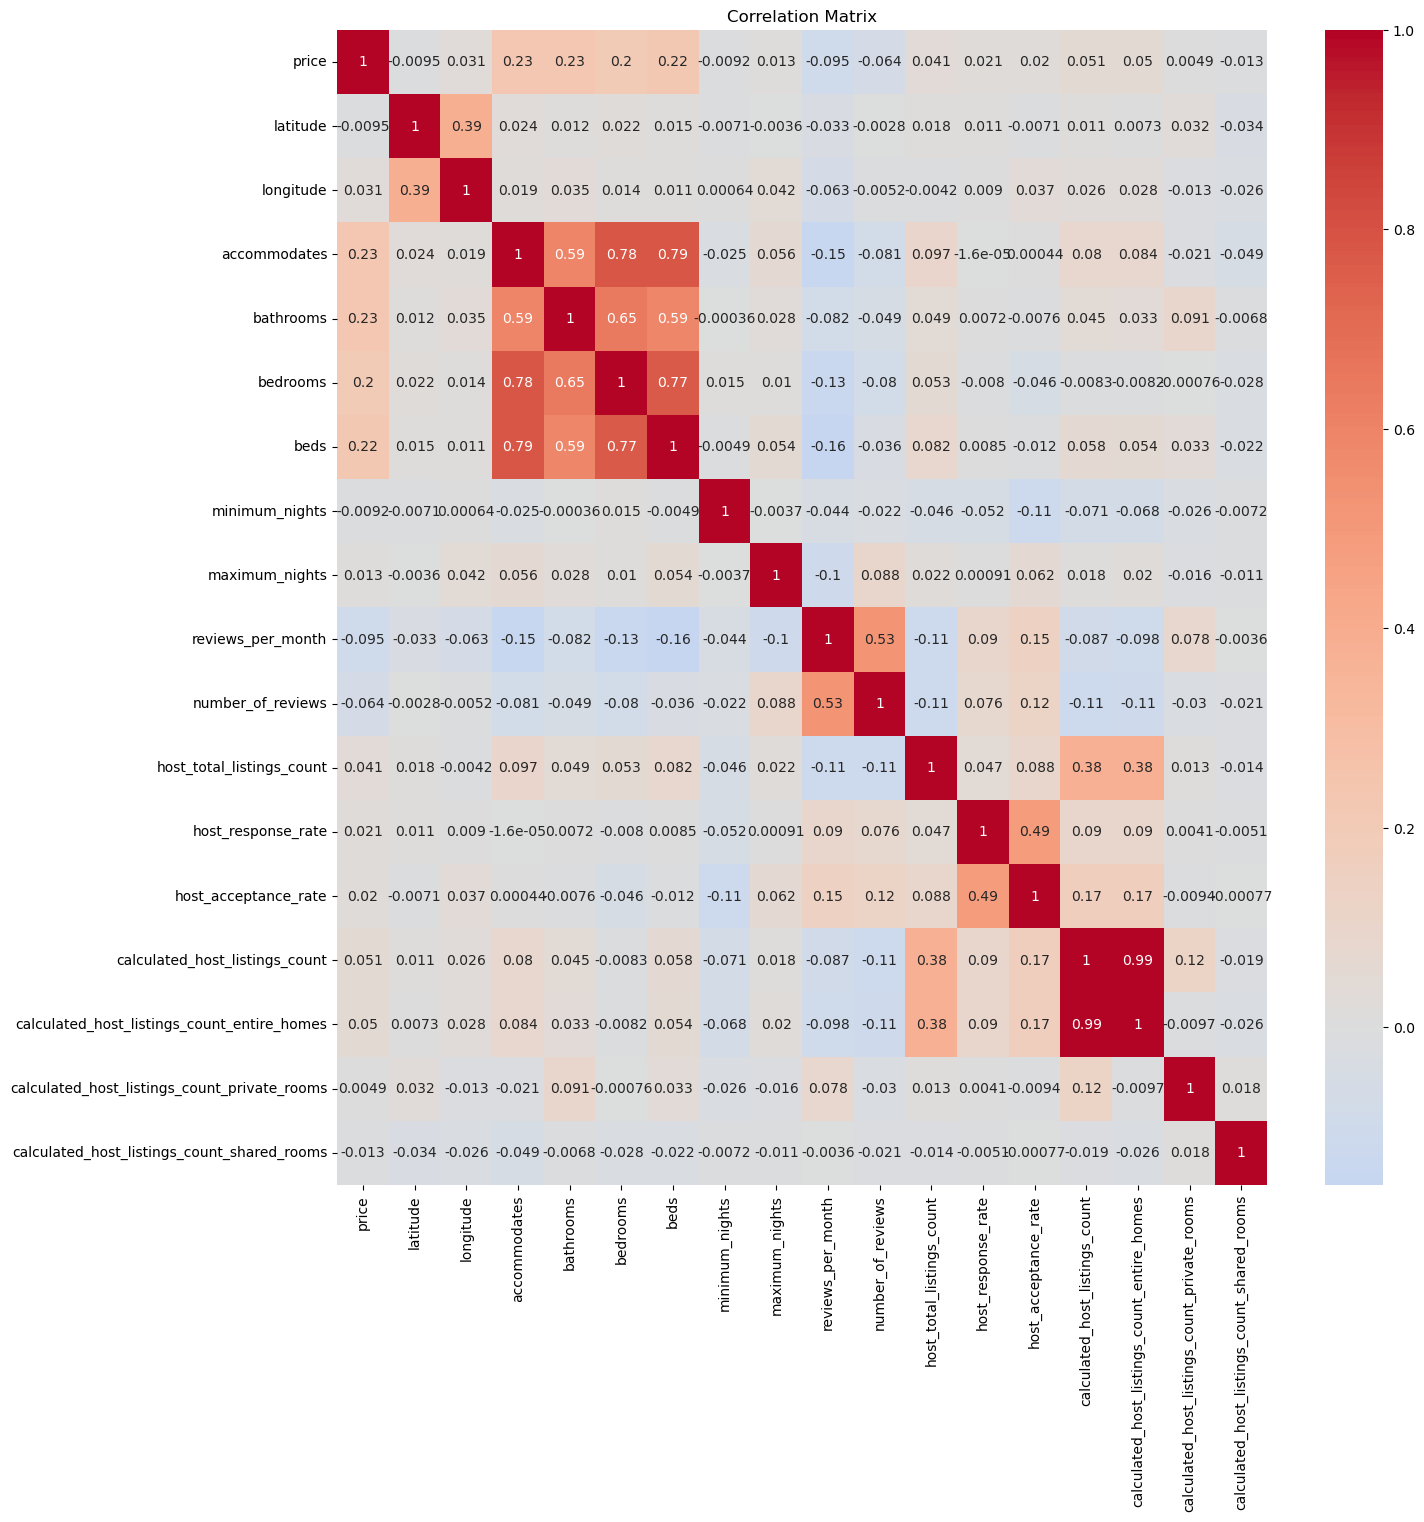

In [32]:
# Create a bigger subplot with matplotlib
f, ax = plt.subplots(figsize=(15,15))  # Increase the size of the plot

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot=True, ax=ax, cmap='coolwarm', center=0) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
# The `cmap` argument sets the color map to 'coolwarm' for better visualization.
# The `center` argument centers the colormap at 0.

# Add a title to the heatmap
ax.set_title('Correlation Matrix')

# Save the image
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\correlation_matrix_subplot_large.png', bbox_inches='tight')

# Show the plot
plt.show()


## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

    Discuss the output in a markdown cell.


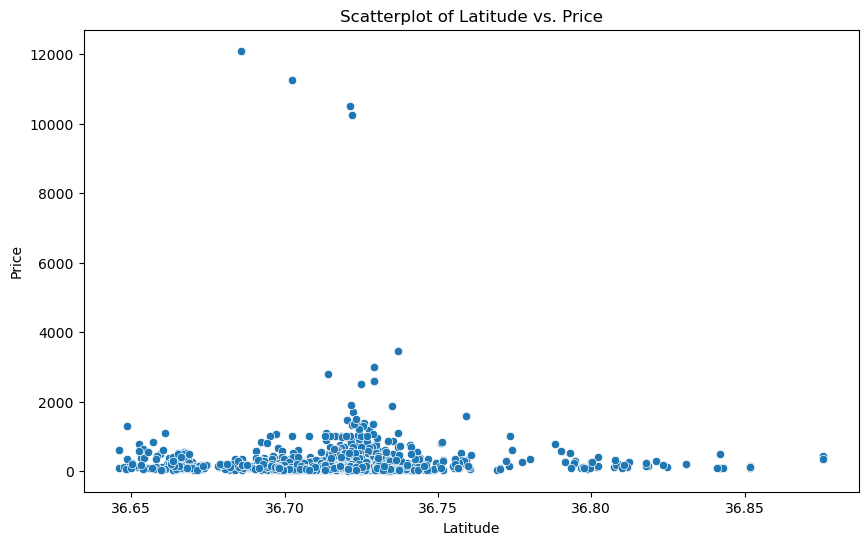

In [40]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 6))

# Create the scatterplot in seaborn by applying a scatterplot onto the subplots defined above
sns.scatterplot(data=numerical_columns, x='latitude', y='price', ax=ax)
# The `ax` argument specifies the subplot to use

# Add a title to the scatterplot
ax.set_title('Scatterplot of Latitude vs. Price')

# Add labels to the axes
ax.set_xlabel('Latitude')
ax.set_ylabel('Price')

# Save the image
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\scatterplot_latitude_price.png', bbox_inches='tight')

# Show the plot
plt.show()


#### The scatterplot of latitude versus price for Airbnb listings in Málaga shows several trends. Most listings cluster at the lower end of the price range, generally below 2000 euros. However, there are several outliers with significantly higher prices, reaching up to 12000 euros, indicating luxury properties or exclusive locations. Listings are spread between latitudes 36.65 and 36.85, with no clear relationship between latitude and price. There is a slight concentration of higher prices around latitude 36.70, suggesting specific areas within the city may influence these prices. This indicates that factors beyond just latitude are affecting the prices of Airbnb listings in Málaga.

## 5. Create a pair plot of the entire data set.

    Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


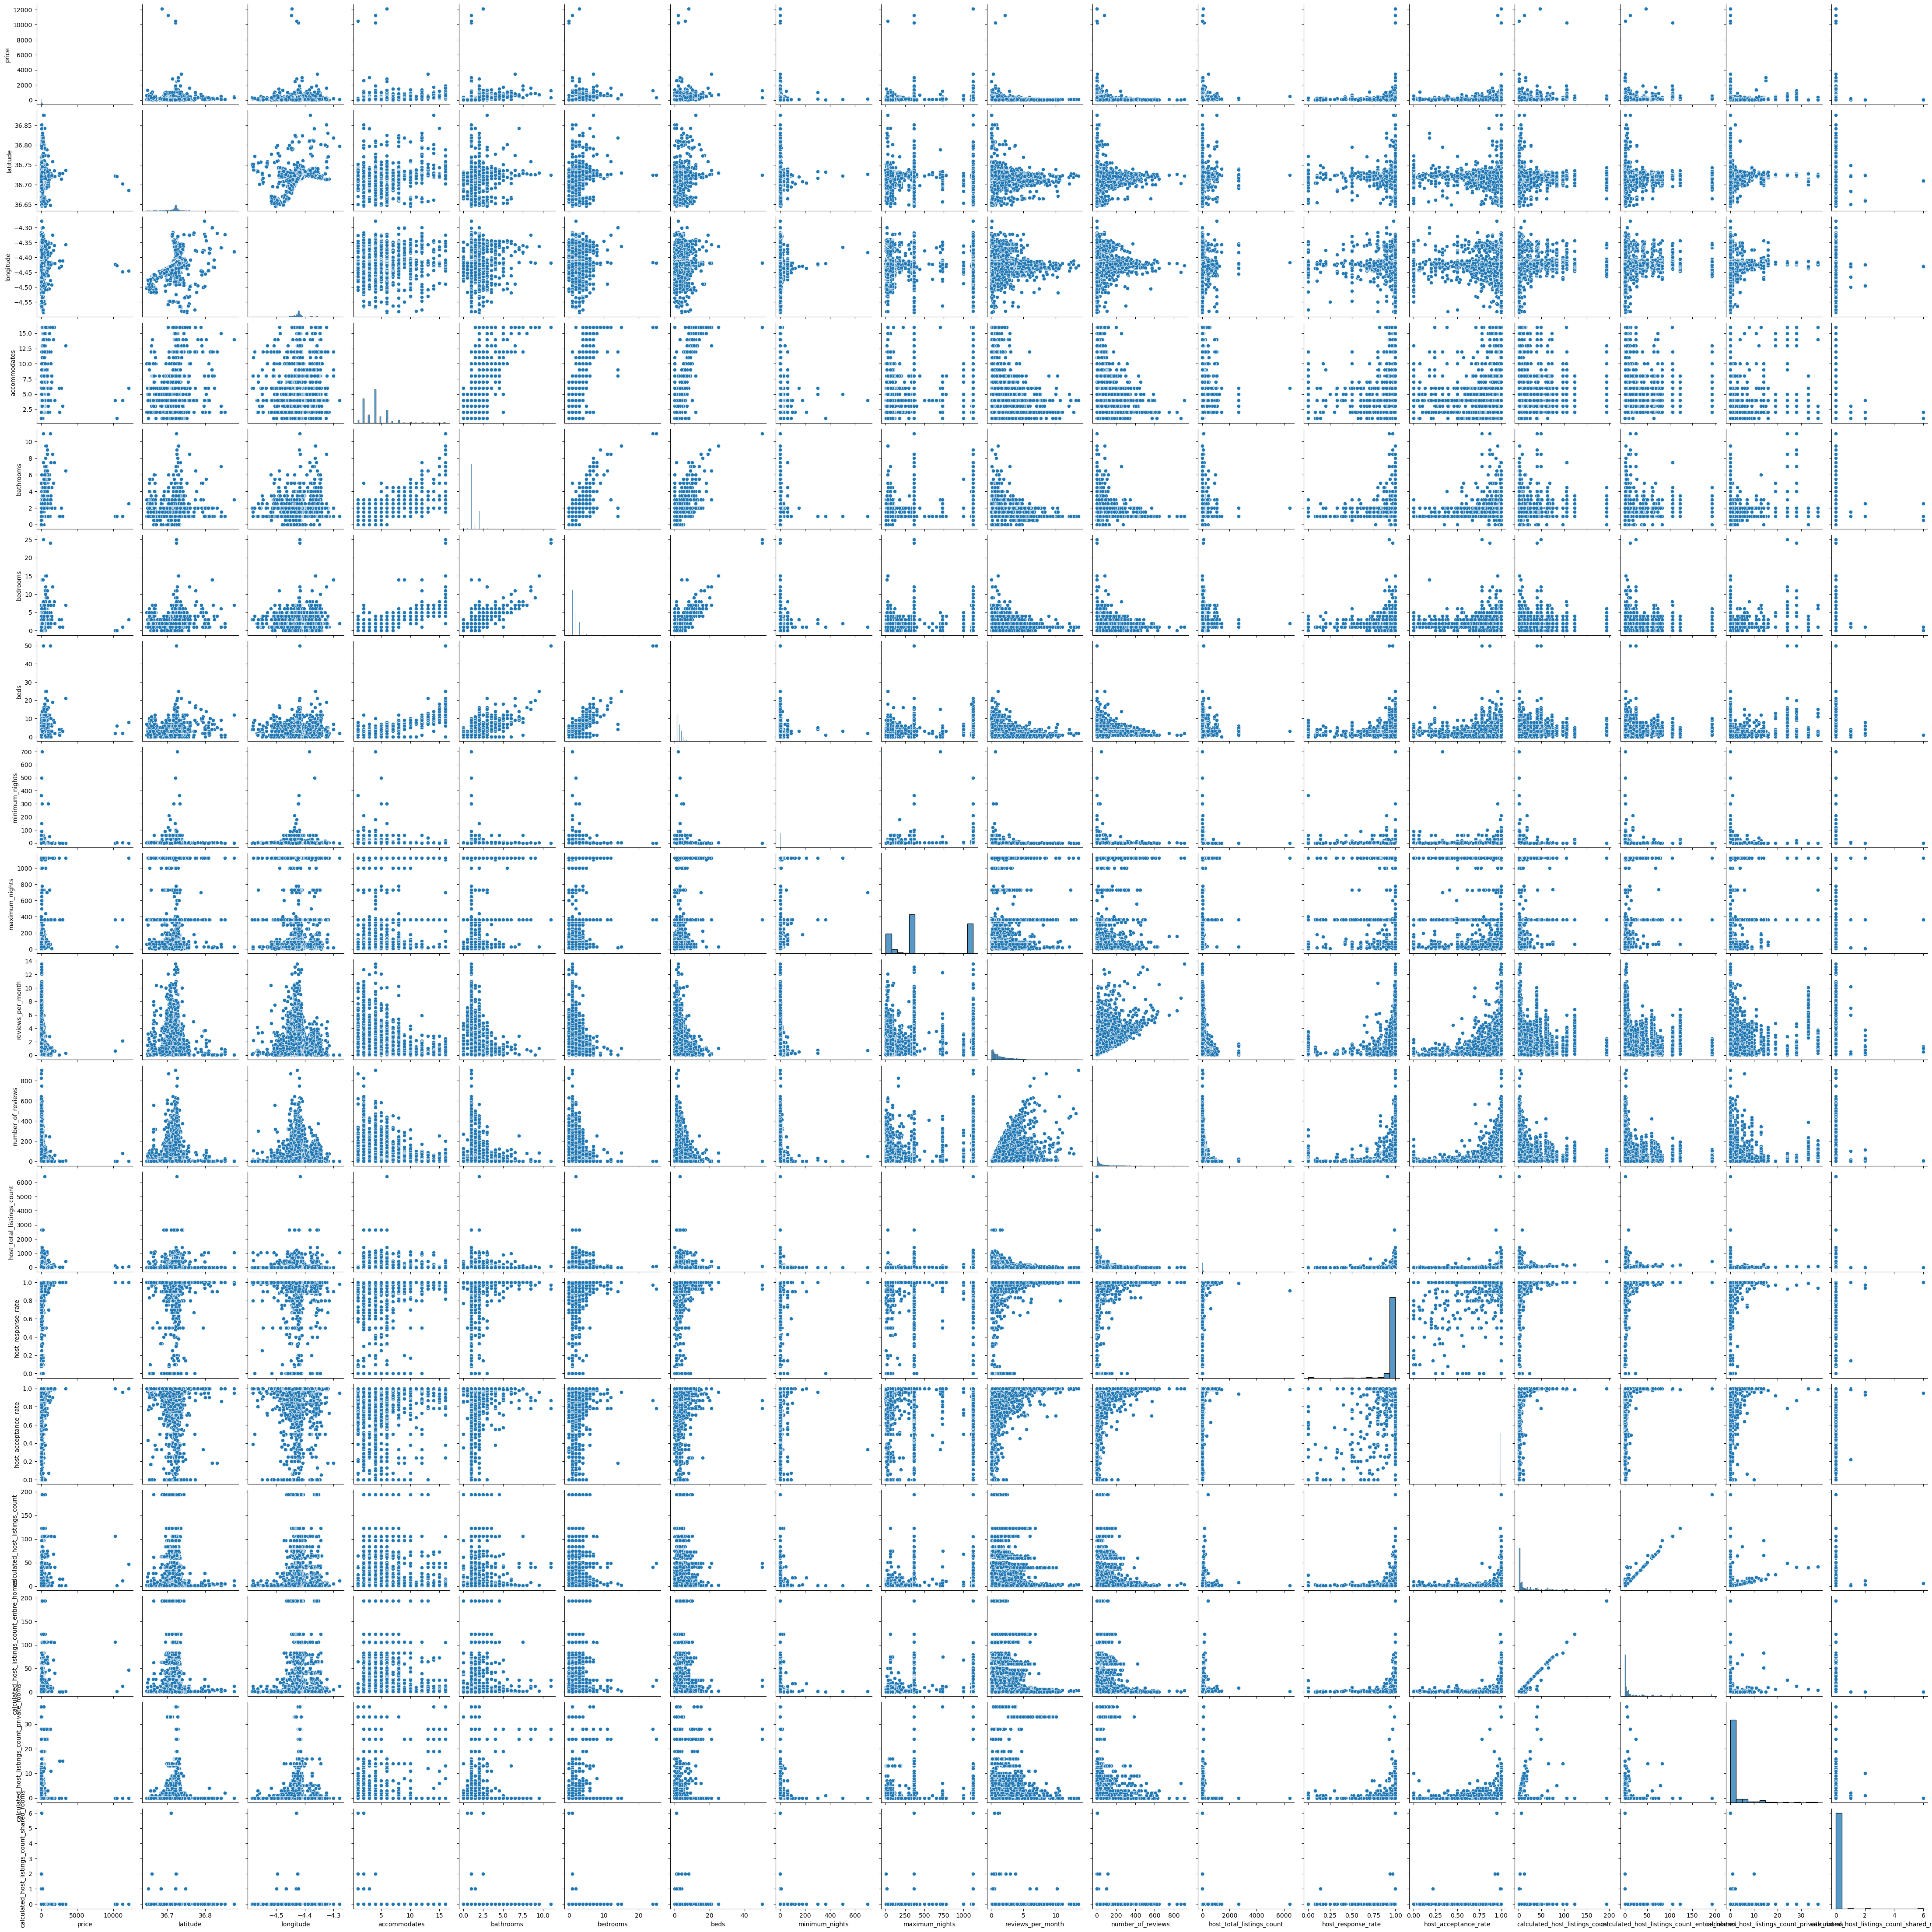

In [46]:
# Create a pair plot of the entire data set

sns.pairplot(numerical_columns)
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\pairplot_numerical_columns.png', bbox_inches='tight')
plt.show()


#### The large number of variables makes the pair plot difficult to read. From what I can see, the most interesting variables are those related to price, in relation to many other variables such as latitude and longitude, which could provide valuable insights.

## 6. Create a categorical plot and interpret the results.

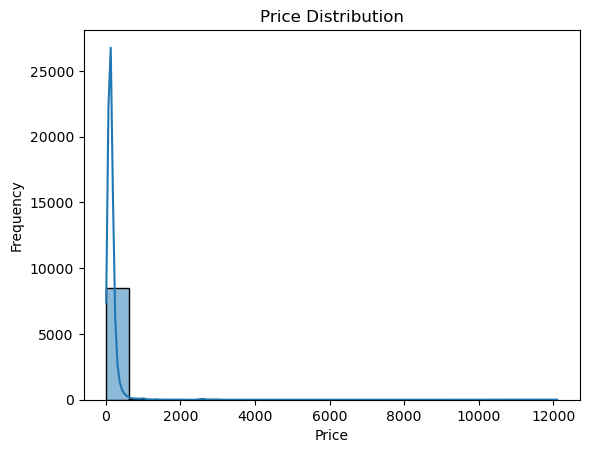

In [52]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(numerical_columns['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Set prices categories

numerical_columns.loc[numerical_columns['price'] < numerical_columns['price'].quantile(0.33), 'Price category'] = 'Low price'
numerical_columns.loc[(numerical_columns['price'] >= numerical_columns['price'].quantile(0.33)) & (numerical_columns['price'] < numerical_columns['price'].quantile(0.66)), 'Price category'] = 'Middle price'
numerical_columns.loc[numerical_columns['price'] >= numerical_columns['price'].quantile(0.66), 'Price category'] = 'High price'


# Count values in each category

numerical_columns['Price category'].value_counts(dropna=False)

Price category
High price      2920
Middle price    2840
Low price       2826
NaN              390
Name: count, dtype: int64

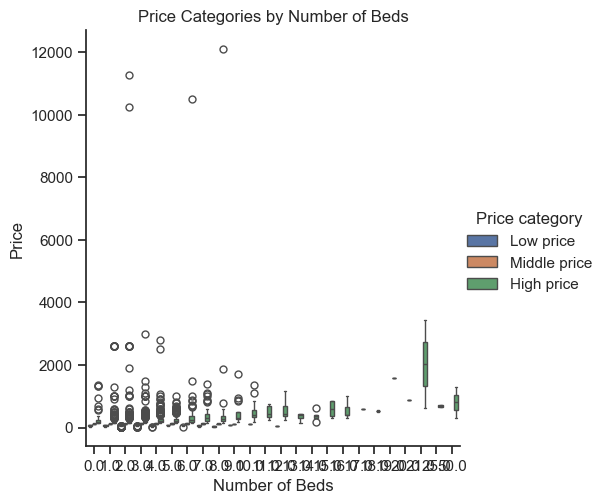

In [60]:
# Create a categorical plot in seaborn using the price categories and number of beds

sns.set(style="ticks")
g = sns.catplot(x="beds", y="price", hue="Price category", data=numerical_columns, kind="box")
g.set_axis_labels("Number of Beds", "Price")
plt.title('Price Categories by Number of Beds')
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\catplot_beds_price.png', bbox_inches='tight')
plt.show()

In [72]:
 numerical_columns['beds'].value_counts(dropna=False)

beds
2.0     2506
1.0     2317
3.0     1580
4.0      957
0.0      464
5.0      381
NaN      327
6.0      181
7.0       91
8.0       47
10.0      31
9.0       27
12.0      20
11.0      15
15.0       6
13.0       5
16.0       5
14.0       5
21.0       2
25.0       2
50.0       2
18.0       2
17.0       1
20.0       1
19.0       1
Name: count, dtype: int64

In [74]:
# Remove rows where the value of 'beds' is greater than 15

numerical_columns = numerical_columns[numerical_columns['beds'] <= 15]

In [76]:
# Remove decimal points from 'beds' and convert to integer
numerical_columns = numerical_columns[numerical_columns['beds'].apply(lambda x: x.is_integer() if pd.notnull(x) else True)]

# Convert 'beds' column to integer
numerical_columns['beds'] = numerical_columns['beds'].astype('Int64')

<Figure size 1400x1000 with 0 Axes>

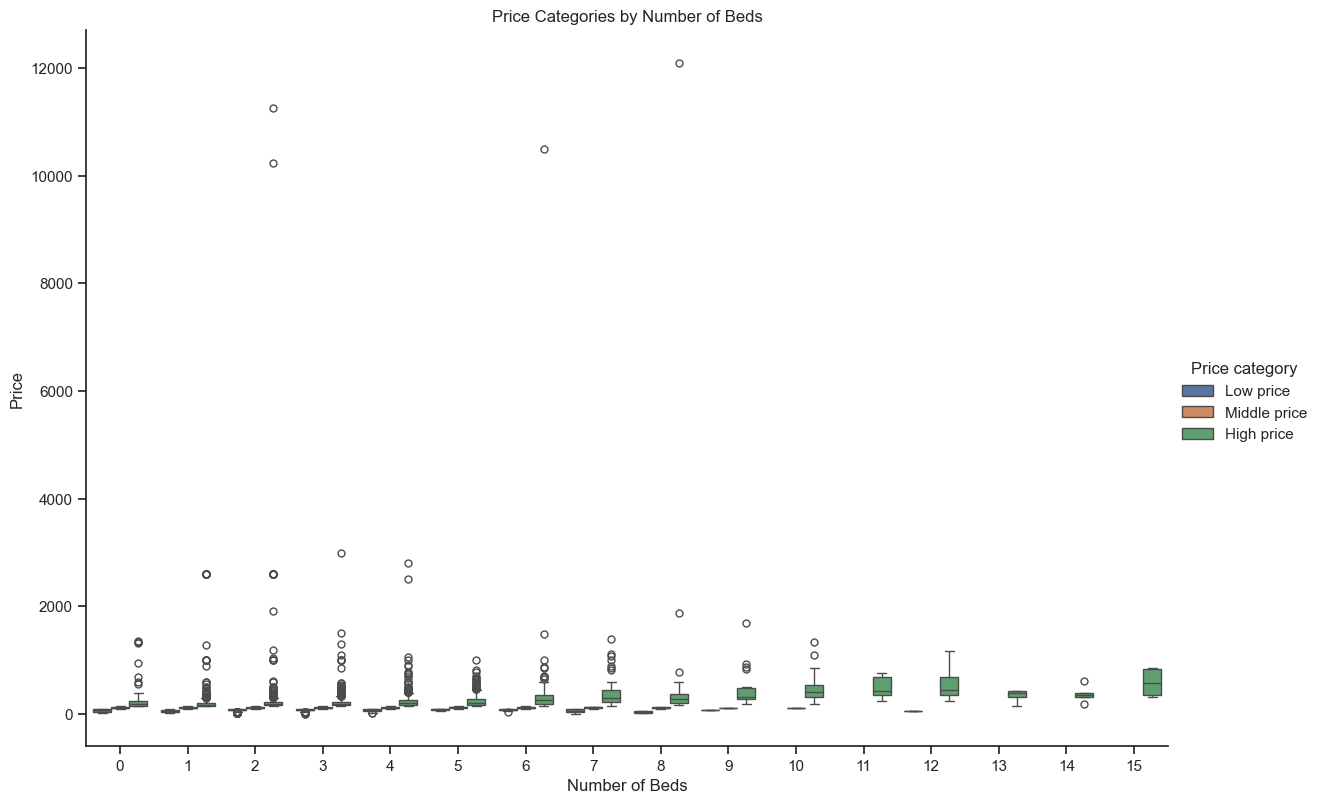

In [78]:
# Set bigger visualization

sns.set(style="ticks")
plt.figure(figsize=(14, 10))  
g = sns.catplot(x="beds", y="price", hue="Price category", data=numerical_columns, kind="box", height=8, aspect=1.5)
g.set_axis_labels("Number of Beds", "Price")
plt.title('Price Categories by Number of Beds')
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\catplot_beds_price_larger.png', bbox_inches='tight')
plt.show()


<Figure size 1400x1000 with 0 Axes>

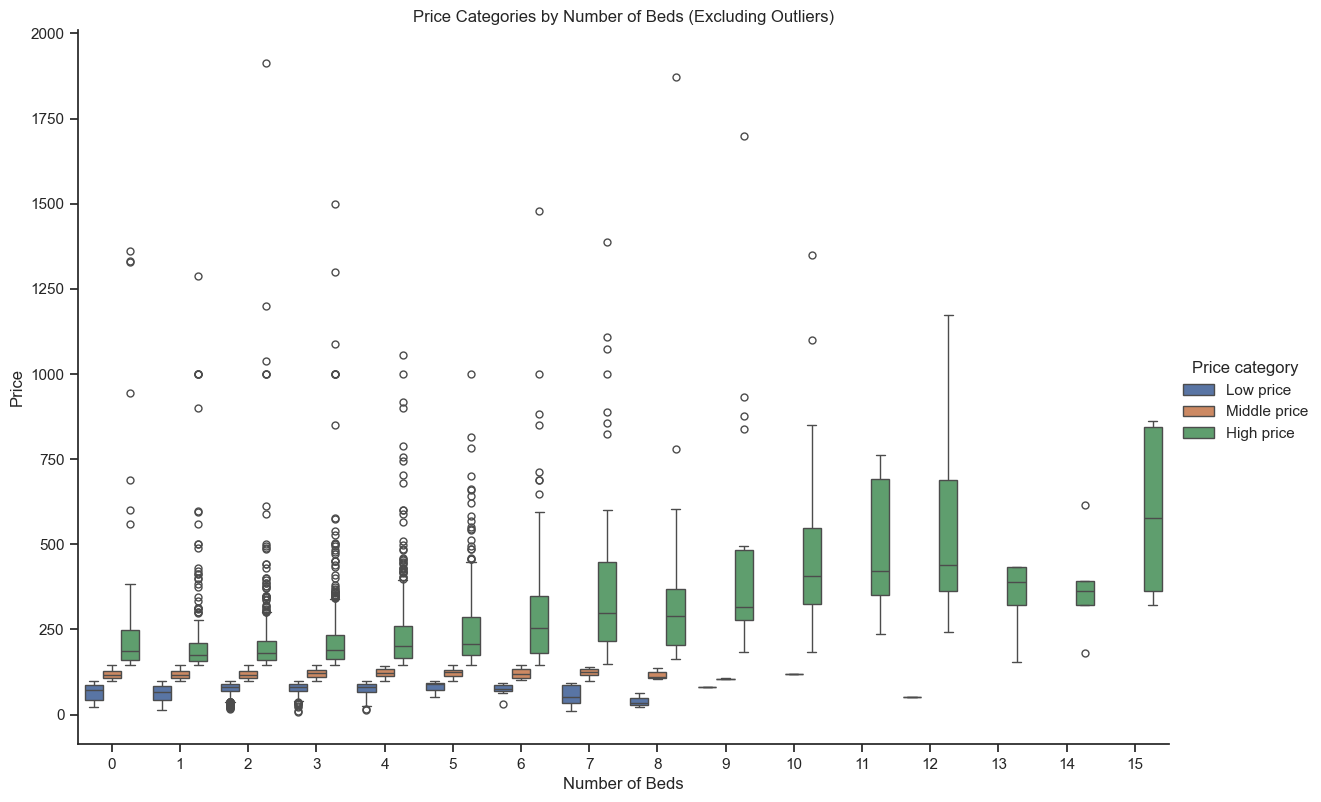

In [80]:
# Filter the data to exclude outliers where the price is greater than 2000
filtered_data = numerical_columns[numerical_columns['price'] <= 2000]

# Create the categorical plot in seaborn using the filtered data
sns.set(style="ticks")
plt.figure(figsize=(14, 10))  # Adjust the size of the plot
g = sns.catplot(x="beds", y="price", hue="Price category", data=filtered_data, kind="box", height=8, aspect=1.5)
g.set_axis_labels("Number of Beds", "Price")
plt.title('Price Categories by Number of Beds (Excluding Outliers)')
plt.savefig(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\catplot_beds_price_filtered.png', bbox_inches='tight')
plt.show()


#### Price Distribution: As the number of beds increases, so does the median price, particularly in the middle and high price categories. This suggests that properties with more beds tend to be more expensive.
#### Price Ranges:  Low-priced properties are mostly in the 0-2 bed range, middle-priced are frequent in 2-5 beds, and high-priced properties span all categories, with increasing prices for more beds.
#### Outliers: Despite filtering out prices above 2000, some outliers remain, particularly in properties with more than 10 beds, indicating some extremely expensive properties in these categories.
####  Properties with more beds show a higher diversity in their prices.

## 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

####    What is the distribution of property prices in Málaga?
        Property prices in Málaga show a wide distribution, with a significant concentration of lower-priced properties and a smaller number of high-priced outliers.

####    How do the number of bedrooms and beds relate to property prices?
        There is a clear positive correlation between the number of bedrooms/beds and property prices. Properties with more beds and bedrooms tend to have higher prices.

####    Are there specific neighborhoods with higher average property prices?
        This question requires a more detailed geographic analysis, possibly using the latitude and longitude data to map properties and analyze neighborhood-specific prices.

####    What is the relationship between property prices and the number of reviews?
        Initial analysis suggests no strong correlation between the number of reviews and property prices.

####    How do property prices vary with the availability status?
        This needs further exploration, but categorizing properties by availability and comparing their prices could provide insights.

### New Questions Based on Early Findings:

####    How does latitude impact property prices in Málaga?
        Higher latitudes seem to correspond with higher property prices, suggesting certain geographic areas are more expensive.

####    What is the impact of the host's total listings count on property prices?
        It would be interesting to explore if hosts with more listings have higher-priced properties, possibly indicating more experienced hosts or larger property portfolios.

####    Are there seasonal variations in property prices?
        Analyzing the calendar data could reveal if there are significant price fluctuations depending on the time of year.

####    How do specific neighborhoods (based on latitude and longitude) correlate with higher property prices in Málaga?
        Initial analysis suggests that properties situated at certain latitudes and longitudes, indicating specific neighborhoods, have higher prices. By mapping these properties, we can identify high-priced neighborhoods and analyze the geographic distribution of property prices in Málaga.


## 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

#### Hypothesis 1: Properties with more beds and bedrooms have higher prices.

    There is a clear positive correlation between the number of bedrooms/beds and property prices. Properties with more beds and bedrooms tend to be priced higher due to their capacity to accommodate more guests.

#### Hypothesis 2: Higher latitude properties in Málaga are more expensive.

    Initial analysis suggests that properties situated at higher latitudes within Málaga correspond with higher property prices, potentially indicating more desirable neighborhoods or locations.

#### Hypothesis 3: Hosts with a higher number of total listings tend to price their properties higher.

    Hosts with more listings might be more experienced and could own properties in premium areas, allowing them to charge higher prices.

#### Hypothesis 5: There are seasonal variations in property prices, with peaks during holiday seasons.

    Demand for accommodations typically increases during holiday seasons, leading to higher prices. Analyzing the calendar data can reveal these seasonal price fluctuations.

#### Hypothesis 6: Specific neighborhoods (identified by latitude and longitude) have higher property prices.

    Certain geographic areas within Málaga, identified by their latitude and longitude, are likely to be more expensive. Mapping these properties can help identify high-priced neighborhoods and analyze the geographic distribution of property prices.